In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

from eoles.write_output import comparison_simulations, comparison_simulations_new, plot_typical_week, plot_typical_demand, plot_residual_demand
from project.write_output import plot_compare_scenarios

# October 2023

In [ ]:
# SCC
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1003_235705_S2_N1_ref_scc"),
               "Ban S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_001351_S2_N1_restrictiongas_scc"),
               "Ban + reno S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_003158_S2_N1_restrictiongas_restrictionreno_scc"),
               "Ref S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_004924_S2p_N1_ref_scc"),
               "Ban S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_010632_S2p_N1_restrictiongas_scc"),
               "Ban + reno S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_012447_S2p_N1_restrictiongas_restrictionreno_scc"),
               "Ref S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_014201_S3_N1_ref_scc"),
               "Ban S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_015938_S3_N1_restrictiongas_scc"),
               "Ban + reno S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_021812_S3_N1_restrictiongas_restrictionreno_scc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1004_policies_exogenous_scc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [ ]:
# SCC + prices constant
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_023552_S2_N1_ref_scc_priceconstant"),
               "Ban S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_025301_S2_N1_restrictiongas_scc_priceconstant"),
               "Ban + reno S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_031111_S2_N1_restrictiongas_restrictionreno_scc_priceconstant"),
               "Ref S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_032830_S2p_N1_ref_scc_priceconstant"),
               "Ban S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_034602_S2p_N1_restrictiongas_scc_priceconstant"),
               "Ban + reno S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_040413_S2p_N1_restrictiongas_restrictionreno_scc_priceconstant"),
               "Ref S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_042148_S3_N1_ref_scc_priceconstant"),
               "Ban S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_043942_S3_N1_restrictiongas_scc_priceconstant"),
               "Ban + reno S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_045804_S3_N1_restrictiongas_restrictionreno_scc_priceconstant"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1004_policies_exogenous_scc_priceconstant")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [ ]:
# SCC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_051547_S2_N1_ref_scc_pricefeedback"),
               "Ban S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_053317_S2_N1_restrictiongas_scc_pricefeedback"),
               "Ban + reno S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_055129_S2_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
               "Ref S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_060855_S2p_N1_ref_scc_pricefeedback"),
               "Ban S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_062606_S2p_N1_restrictiongas_scc_pricefeedback"),
               "Ban + reno S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_064439_S2p_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
               "Ref S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_070211_S3_N1_ref_scc_pricefeedback"),
               "Ban S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_071949_S3_N1_restrictiongas_scc_pricefeedback"),
               "Ban + reno S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_073811_S3_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1004_policies_exogenous_scc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [4]:
# NEW 1005 : SCC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    'Low gas': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_020535_S2_N1_ref_scc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_014828_S2_N1_ambitious_scc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_144031_S2_N1_restrictiongas_scc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_150025_S2_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
        },
    'Middle gas': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_030510_S2p_N1_ref_scc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_024745_S2p_N1_ambitious_scc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_150142_S2p_N1_restrictiongas_scc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_142328_S2p_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
        },
    'High gas': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_040509_S3_N1_ref_scc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_034755_S3_N1_ambitious_scc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_142236_S3_N1_restrictiongas_scc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_144228_S3_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
        }
    }

# results_resirf = {}
# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1005_policies_exogenous_scc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

/Users/celia/Documents/These/python_projects/eoles2/eoles/write_output.py:781: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_system_costs_df = total_system_costs_df.append(hc_excluded)


ValueError: Columns must be same length as key

TypeError: 'AxesSubplot' object is not subscriptable

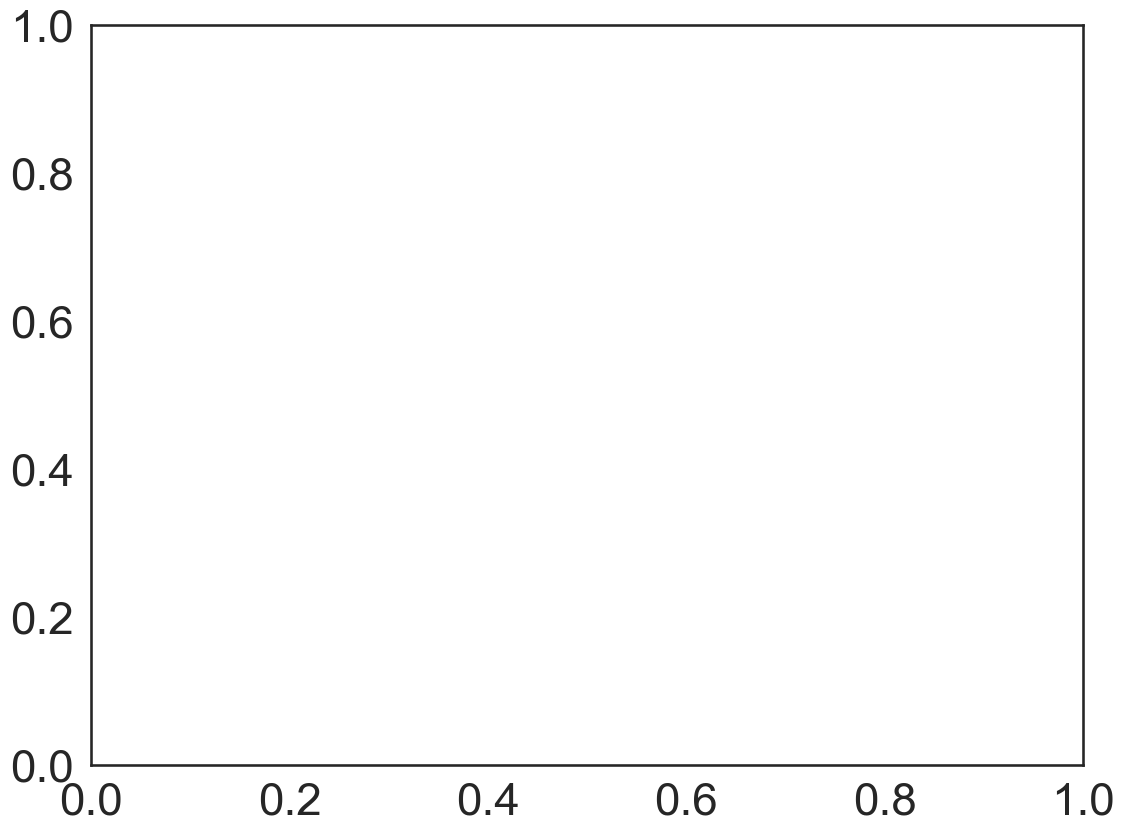

In [4]:
# NEW 1005 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'Low gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122623_S2_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124512_S2_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
     'Middle gas': {
         "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
         "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
         "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124717_S2p_N1_restrictiongas_cc_pricefeedback"),
         "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120953_S2p_N1_restrictiongas_restrictionreno_cc_pricefeedback")
     },
     # 'High gas': {
     #    "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_010610_S3_N1_ref_cc_pricefeedback"),
     #    "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_004919_S3_N1_ambitious_cc_pricefeedback"),
     #    "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120831_S3_N1_restrictiongas_cc_pricefeedback"),
     #    "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122821_S3_N1_restrictiongas_restrictionreno_cc_pricefeedback")
     # }
}
# dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
#                "Ambitious S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
#                # "Ban S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_053317_S2_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_055129_S2_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                "Ref S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
#                "Ambitious S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
#                # "Ban S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_062606_S2p_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_064439_S2p_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                "Ref S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_010610_S3_N1_ref_cc_pricefeedback"),
#                "Ambitious S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_004919_S3_N1_ambitious_cc_pricefeedback"),
#                # "Ban S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_071949_S3_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_073811_S3_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                }

results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1005_policies_exogenous_cc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

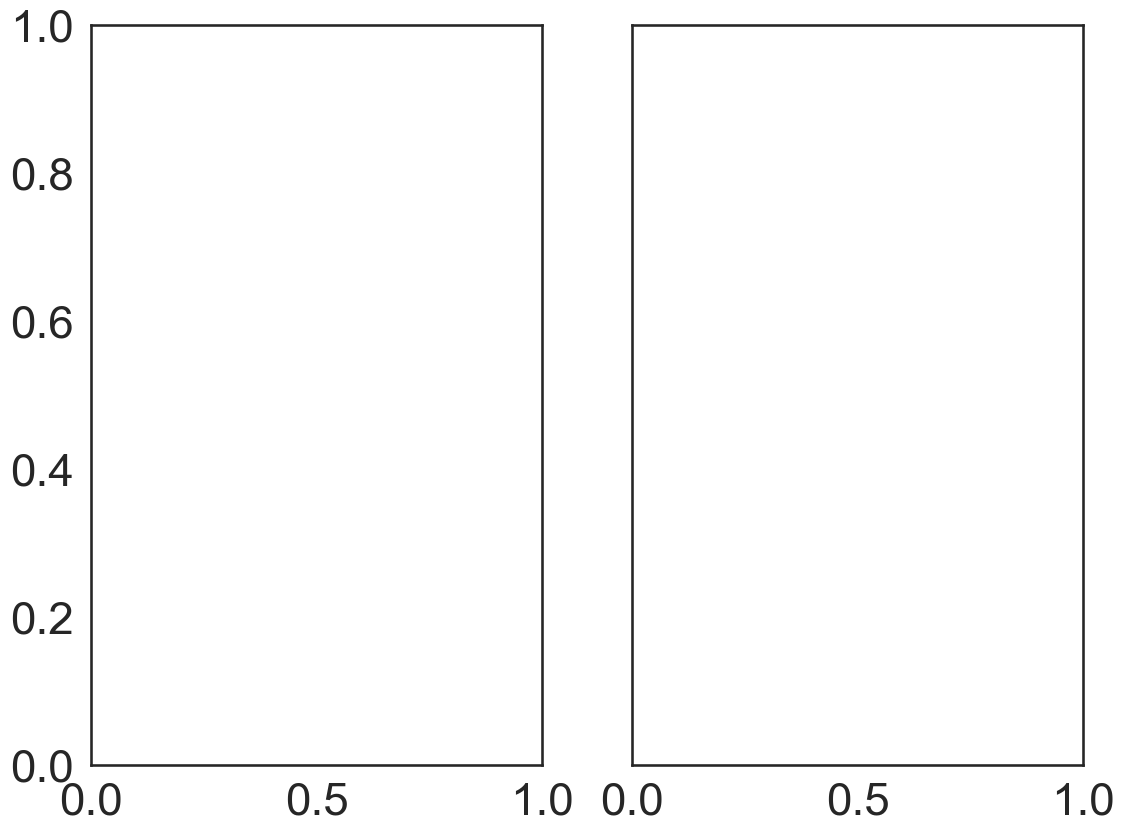

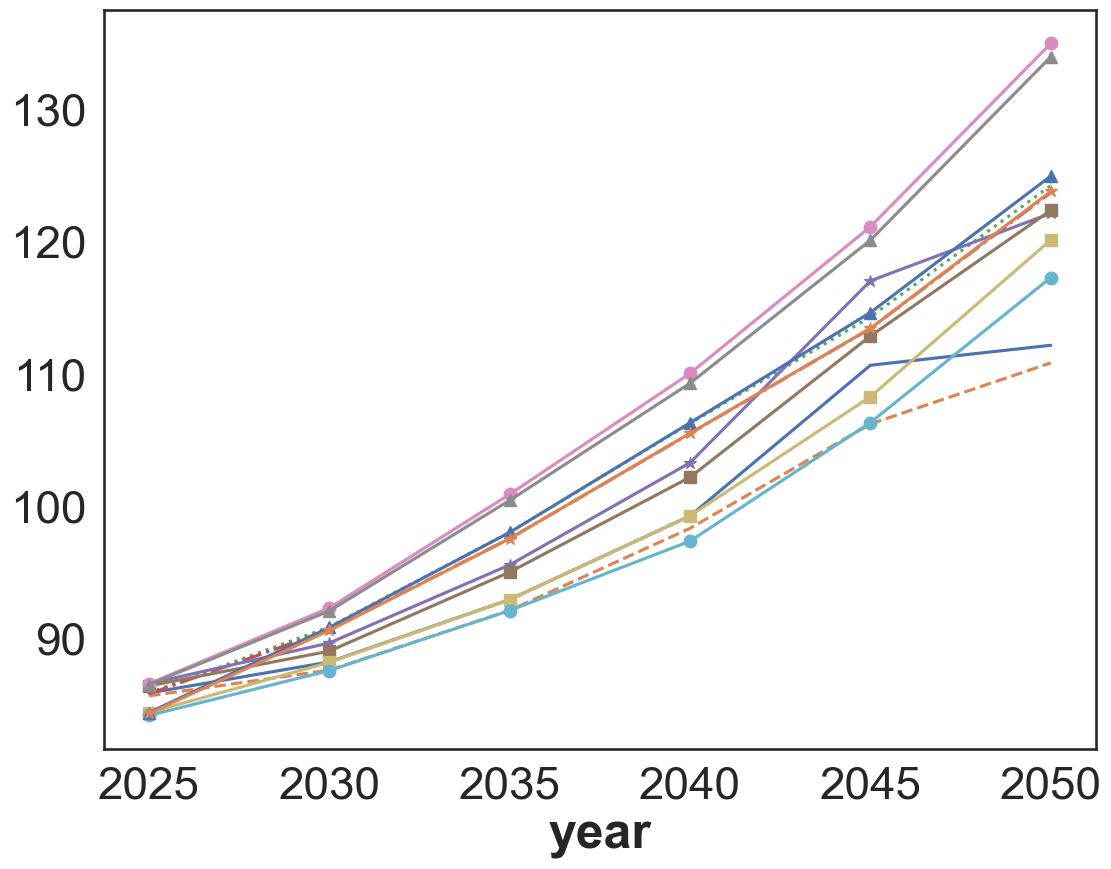

In [6]:
# NEW 1005 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    'Low renewable': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_185003_S2p_N1ren_ref_cc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183226_S2p_N1ren_ambitious_cc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183146_S2p_N1ren_restrictiongas_cc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_184857_S2p_N1ren_restrictiongas_restrictionreno_cc_pricefeedback")
    },
    #     'Low gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122623_S2_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124512_S2_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    'Reindustrialization': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_175151_S2p_N1_reindus_ref_cc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_175123_S2p_N1_reindus_ambitious_cc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_180933_S2p_N1_reindus_restrictiongas_cc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_181052_S2p_N1_reindus_restrictiongas_restrictionreno_cc_pricefeedback")
     },
     'Reference': {
         "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
         "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
         "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124717_S2p_N1_restrictiongas_cc_pricefeedback"),
         "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120953_S2p_N1_restrictiongas_restrictionreno_cc_pricefeedback")
     },
     'Ambitious renewable': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192441_S2p_Opt_ref_cc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192639_S2p_Opt_ambitious_cc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190607_S2p_Opt_restrictiongas_cc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190805_S2p_Opt_restrictiongas_restrictionreno_cc_pricefeedback")
     },
    # 'High gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_010610_S3_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_004919_S3_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120831_S3_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122821_S3_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    #  }
}
# dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
#                "Ambitious S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
#                # "Ban S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_053317_S2_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_055129_S2_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                "Ref S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
#                "Ambitious S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
#                # "Ban S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_062606_S2p_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_064439_S2p_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                "Ref S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_010610_S3_N1_ref_cc_pricefeedback"),
#                "Ambitious S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_004919_S3_N1_ambitious_cc_pricefeedback"),
#                # "Ban S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_071949_S3_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_073811_S3_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                }

results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1005_policies_exogenous_cc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [22]:
sns.set_theme(context="talk", style="white")

hourly_generation = pd.read_csv("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 2, 7, 0, 0), datetime.datetime(2006, 2, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False)

<AxesSubplot:>

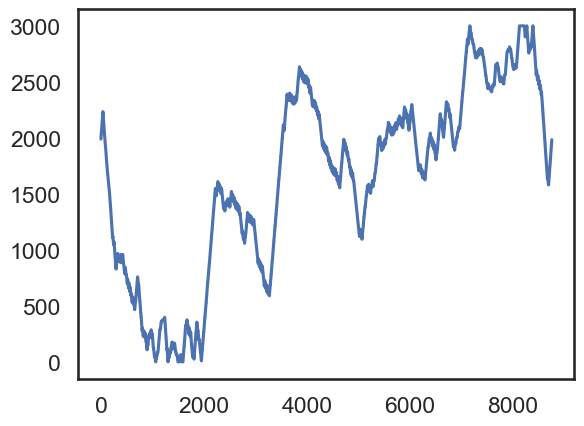

In [17]:
hourly_generation.hydrogen_charge.plot()

In [23]:
hourly_generation = pd.read_csv("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124717_S2p_N1_restrictiongas_cc_pricefeedback/dataframes/hourly_generation_2050.csv", index_col=0)

plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=os.path.join("eoles/outputs/comparison/hourly_generation.png"), methane=False, y_max=180, y_min=-50)

<AxesSubplot:>

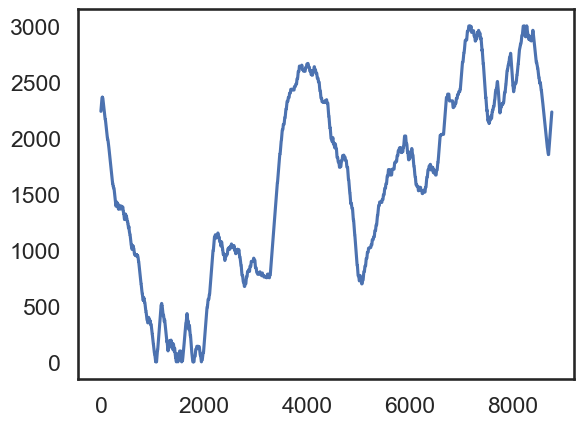

In [15]:
hourly_generation.hydrogen_charge.plot()

# Endogenous policies

In [18]:
# NEW : with price evolution
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim/1006_023053_centralized_insulation_S2p_N1"),
    #     "Uniform": os.path.join("eoles/outputs/1006_optim/1006_131656_uniform_S2p_N1"),
    #     "DR": os.path.join("eoles/outputs/1006_optim/1006_125745_DR_S2p_N1"),
    # },
     '': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim/1006_015322_centralized_insulation_S3_N1"),
        "Uniform": os.path.join("eoles/outputs/1006_optim/1006_123757_uniform_S3_N1"),
        "DR": os.path.join("eoles/outputs/1006_optim/1006_122937_DR_S3_N1"),
     },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim/1006_030045_centralized_insulation_S3_N1nuc"),
     #    "Uniform": os.path.join("eoles/outputs/1006_optim/1006_130109_uniform_S3_N1nuc"),
     #    "DR": os.path.join("eoles/outputs/1006_optim/1006_130634_DR_S3_N1nuc"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1006_optim")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Uniform", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [3]:
# NEW : with price constant
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_024851_centralized_insulation_S2p_N1_pricesconstant"),
    #     "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_140534_uniform_S2p_N1_pricesconstant"),
    #     "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_132733_DR_S2p_N1_pricesconstant"),
    # },
     '': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_031337_centralized_insulation_S3_N1_pricesconstant"),
        "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_134810_uniform_S3_N1_pricesconstant"),
        "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_135750_DR_S3_N1_pricesconstant"),
     },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_025135_centralized_insulation_S3_N1nuc_pricesconstant"),
     #    "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_133621_uniform_S3_N1nuc_pricesconstant"),
     #    "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_134154_DR_S3_N1nuc_pricesconstant"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1006_optim_pricesconstant")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Uniform", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [2]:
# NEW : with price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_024851_centralized_insulation_S2p_N1_pricesconstant"),
    #     "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_140534_uniform_S2p_N1_pricesconstant"),
    #     "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_132733_DR_S2p_N1_pricesconstant"),
    # },
     '': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_025117_centralized_insulation_S2p_N1_pricefeedback"),
        "Uniform": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_134516_uniform_S2p_N1_pricefeedback"),
        "DR": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_133816_DR_S2p_N1_pricefeedback"),
     },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_025135_centralized_insulation_S3_N1nuc_pricesconstant"),
     #    "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_133621_uniform_S3_N1nuc_pricesconstant"),
     #    "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_134154_DR_S3_N1nuc_pricesconstant"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1006_optim_pricesfeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

# New runs

TypeError: 'AxesSubplot' object is not subscriptable

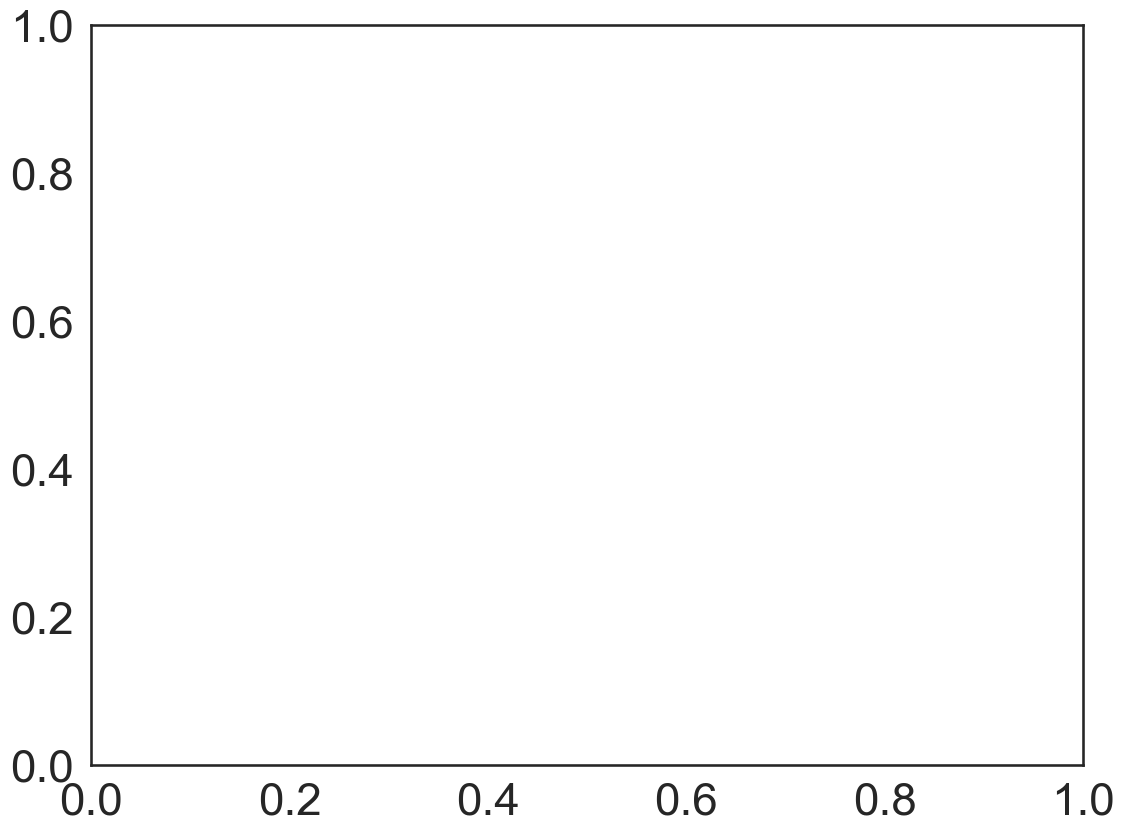

In [2]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Uniform": os.path.join("eoles/outputs/0828_S3_N1/0826_225609_uniform_S3_N1"),
               "Uniform 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_004316_uniform_S3_N1_2y"),
               # "No subsidy heater": os.path.join("eoles/outputs/0429_080811_no_subsidy_heater_greenfield"),
               # "No subsidy insulation": os.path.join("eoles/outputs/0429_083155_no_subsidy_insulation_greenfield"),
               "Deep renovation": os.path.join("eoles/outputs/0828_S3_N1/0826_230609_GR_S3_N1"),
               "Deep renovation 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_005742_GR_S3_N1_2y"),
               # "Global renovation low income": os.path.join("eoles/outputs/0504_greenfield_S3_N1/0505_085156_GR_low_income_greenfield_S3_N1"),
               # "Global renovation \n FGE": os.path.join("eoles/outputs/0510_S3_N1/0509_223231_GR_fge_S3_N1"),
               # "MWh_tCO2": os.path.join("eoles/outputs/0510_S3_N1/0509_221317_MWh_tCO2_S3_N1"),
               # "Proportional": os.path.join("eoles/outputs/0510_S3_N1/0511_035113_MWh_insulation_S3_N1"),
               "Insulation technical \n optimum": os.path.join("eoles/outputs/0828_S3_N1/0826_154702_centralized_insulation_S3_N1"),
               "Insulation technical \n optimum 2y": os.path.join("eoles/outputs/0828_S3_N1/0827_154945_centralized_insulation_S3_N1_2y"),
               # "MWh": os.path.join("eoles/outputs/0506_greenfield_S3_N1/0509_130427_MWh_insulation_greenfield_S3_N1"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0905_S3_N1")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform", greenfield=True, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=True)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [8]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {# "Uniform": os.path.join("eoles/outputs/0828_S3_N1/0826_225609_uniform_S3_N1"),
               "Uniform 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_004316_uniform_S3_N1_2y"),
               # "No subsidy heater": os.path.join("eoles/outputs/0429_080811_no_subsidy_heater_greenfield"),
               # "No subsidy insulation": os.path.join("eoles/outputs/0429_083155_no_subsidy_insulation_greenfield"),
               # "Deep renovation": os.path.join("eoles/outputs/0828_S3_N1/0826_230609_GR_S3_N1"),
               "Deep renovation 2y": os.path.join("eoles/outputs/0828_S3_N1/0828_005742_GR_S3_N1_2y"),
               # "Global renovation low income": os.path.join("eoles/outputs/0504_greenfield_S3_N1/0505_085156_GR_low_income_greenfield_S3_N1"),
               # "Global renovation \n FGE": os.path.join("eoles/outputs/0510_S3_N1/0509_223231_GR_fge_S3_N1"),
               # "MWh_tCO2": os.path.join("eoles/outputs/0510_S3_N1/0509_221317_MWh_tCO2_S3_N1"),
               # "Proportional": os.path.join("eoles/outputs/0510_S3_N1/0511_035113_MWh_insulation_S3_N1"),
               # "Insulation technical \n optimum": os.path.join("eoles/outputs/0828_S3_N1/0826_154702_centralized_insulation_S3_N1"),
               "Insulation technical \n optimum 2y": os.path.join("eoles/outputs/0828_S3_N1/0827_154945_centralized_insulation_S3_N1_2y"),
               # "MWh": os.path.join("eoles/outputs/0506_greenfield_S3_N1/0509_130427_MWh_insulation_greenfield_S3_N1"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0905_S3_N1_2y")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform 2y", greenfield=True, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=True)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform 2y")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

# Exogenous Res-IRF policies

In [168]:
# 0915
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_111407_uniform_S2_N1_ref_scc"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_113503_uniform_S2_N1_restrictiongas_scc"),
               "Ref S2p N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_122722_uniform_S2p_N1_ref_scc"),
               "Restriction gas S2p N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_124400_uniform_S2p_N1_restrictiongas_scc"),
               "Ref S3 N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_133443_uniform_S3_N1_ref_scc"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0915_policies_exogenous_scc/0915_135210_uniform_S3_N1_restrictiongas_scc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0915_resirf_exogenous_scc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [26]:
# I add a carbon constraint instead of SCC

sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {# "Ref S2 N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_153817_S2_N1_ref_cc"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_155359_S2_N1_restrictiongas_cc"),
               # "Ref S2p N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_162018_S2p_N1_ref_cc"),
               "Restriction gas S2p N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_163703_S2p_N1_restrictiongas_cc"),
               # "Ref S3 N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_170347_S3_N1_ref_cc"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0915_policies_exogenous_cc/0915_172002_S3_N1_restrictiongas_cc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0915_resirf_exogenous_cc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Restriction gas S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Restriction gas S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [28]:
# I add an endogenous subsidy for insulation

sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {# "Ref S2 N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_165908_DR_S2_N1_ref_cc"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_193510_DR_S2_N1_restrictiongas_cc"),
               "Ref S2p N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_182245_DR_S2p_N1_ref_cc"),
               "Restriction gas S2p N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_201826_DR_S2p_N1_restrictiongas_cc"),
               "Ref S3 N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_180705_DR_S3_N1_ref_cc"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0915_DR_policies_exogenous_cc/0916_203057_DR_S3_N1_restrictiongas_cc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0915_DR_resirf_exogenous_cc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Restriction gas S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Restriction gas S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [67]:
# I modified the policies reference file (no cap on total subsidy) + add a constraint on hydrogen storage usage

sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc/0918_163505_S2_N1_ref_scc"),
               "Ref S2p N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc/0918_160133_S2p_N1_ref_scc"),
               "Ref S3 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc/0918_161810_S3_N1_ref_scc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0918_resirf_exogenous_scc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [166]:
# Adding price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_211311_S2_N1_ref_scc_pricefeedback"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_200915_S2_N1_restrictiongas_scc_pricefeedback"),
               "Ref S2p N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_190927_S2p_N1_ref_scc_pricefeedback"),
               "Restriction gas S2p N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_222544_S2p_N1_restrictiongas_scc_pricefeedback"),
               "Ref S3 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_194705_S3_N1_ref_scc_pricefeedback"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0918_policies_exogenous_scc_pricefeedback/0918_192702_S3_N1_restrictiongas_scc_pricefeedback"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0918_resirf_exogenous_scc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [167]:
# Adding multiple weather years

sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_183552_S2_N1_ref_scc"),
               "Restriction gas S2 N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_183951_S2_N1_restrictiongas_scc"),
               "Ref S2p N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_181427_S2p_N1_ref_scc"),
               # "Restriction gas S2p N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0915_124400_uniform_S2p_N1_restrictiongas_scc"),
               "Ref S3 N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_203549_S3_N1_ref_scc"),
               "Restriction gas S3 N1": os.path.join("eoles/outputs/0919_policies_exogenous_scc_19y/0919_234800_S3_N1_restrictiongas_scc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0919_resirf_exogenous_scc_19y")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [2]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Reference": os.path.join("eoles/outputs/0908_185232_uniform_S3_N1_ref"),
               "Restriction gas N1": os.path.join("eoles/outputs/0908_185334_uniform_S3_N1_restrictiongas"),
               "Restriction gas N1nuc": os.path.join("eoles/outputs/0908_192958_uniform_S3_N1nuc_restrictiongas"),
               "Restriction gas Opt": os.path.join("eoles/outputs/0908_193029_uniform_S3_Opt_restrictiongas")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0908_resirf_exogenous")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Reference")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

ZeroDivisionError: float division by zero

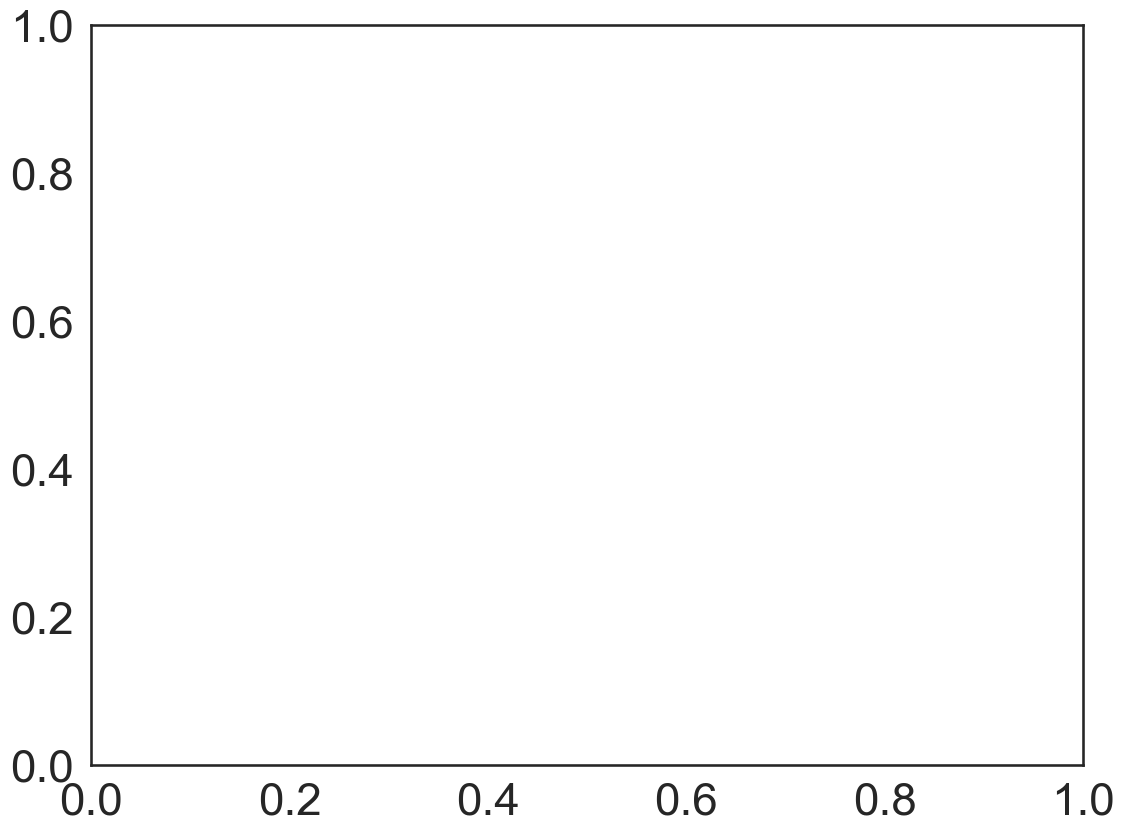

In [15]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
               "Restriction gas N1": os.path.join("eoles/outputs/0908_195504_uniform_S3_N1_restrictiongas_cc"),
               "Restriction gas N1nuc": os.path.join("eoles/outputs/0908_195621_uniform_S3_N1nuc_restrictiongas_cc"),
               "Restriction gas Opt": os.path.join("eoles/outputs/0908_195647_uniform_S3_Opt_restrictiongas_cc")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0908_resirf_exogenous_cc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Restriction gas N1", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Restriction gas N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

# New version ResIRF

In [53]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Uniform": os.path.join("eoles/outputs/0910_S3_N1/0910_191912_uniform_S3_N1"),
               "Deep renovation": os.path.join("eoles/outputs/0910_S3_N1/0912_205131_DR_S3_N1"),
               "Insulation technical \n optimum": os.path.join("eoles/outputs/0910_S3_N1/0910_122544_centralized_insulation_S3_N1")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0910_S3_N1")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [54]:
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Uniform": os.path.join("eoles/outputs/0910_S3_N1_noHC/0912_190000_uniform_S3_N1_noHC"),
               "Deep renovation": os.path.join("eoles/outputs/0910_S3_N1_noHC/0912_190604_DR_S3_N1_noHC"),
               "Insulation technical \n optimum": os.path.join("eoles/outputs/0910_S3_N1_noHC/0912_112514_centralized_insulation_S3_N1_noHC")
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/0910_S3_N1_noHC")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Uniform", greenfield=False, health=False, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Uniform")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [55]:
vre_profiles_1 = pd.read_csv("eoles/inputs/hourly_profiles/vre_profiles_2006_2004.csv", index_col=0)
vre_profiles_2 = pd.read_csv("eoles/inputs/hourly_profiles/vre_profiles_all_years.csv", index_col=0)
vre_profiles_3 = pd.read_csv("eoles/inputs/hourly_profiles/vre_profiles_19y.csv", index_col=0)
vre_profiles_1 = vre_profiles_1.rename(columns={"0": "hour"})
vre_profiles_2 = vre_profiles_2.rename(columns={"0": "hour"})
vre_profiles_3 = vre_profiles_3.rename(columns={"0": "hour"})

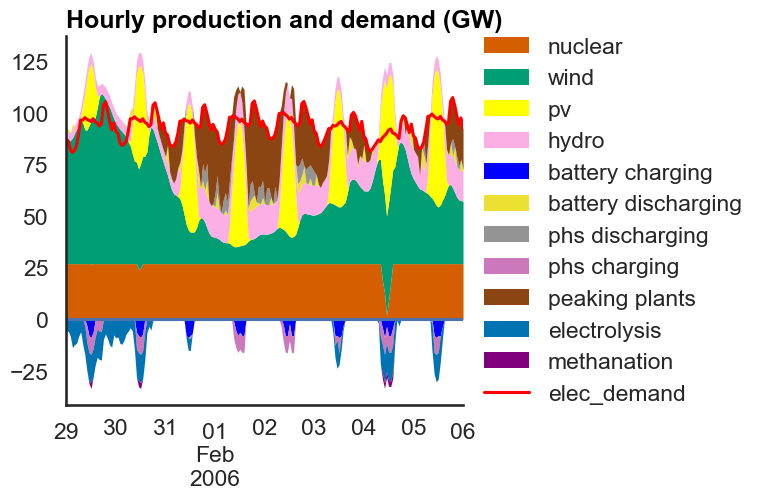

In [68]:
sns.set_theme(context="talk", style="white")
hourly_generation = pd.read_csv("eoles/outputs/0910_S3_N1/0910_191912_uniform_S3_N1/dataframes/hourly_generation_2050.csv", index_col=0)
hourly_generation = pd.read_csv("eoles/outputs/0918_policies_exogenous_scc/0918_161810_S3_N1_ref_scc/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 1, 29, 0, 0), datetime.datetime(2006, 2, 6, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False)

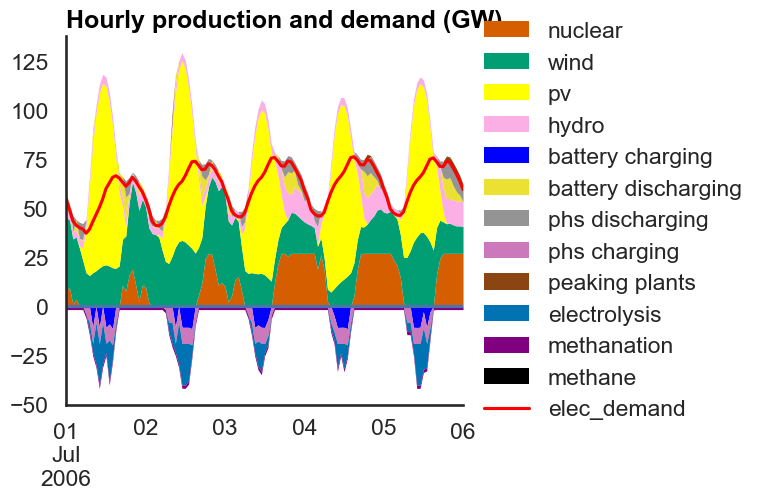

In [4]:
date_start, date_end = datetime.datetime(2006, 7, 1, 0, 0), datetime.datetime(2006, 7, 6, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None)

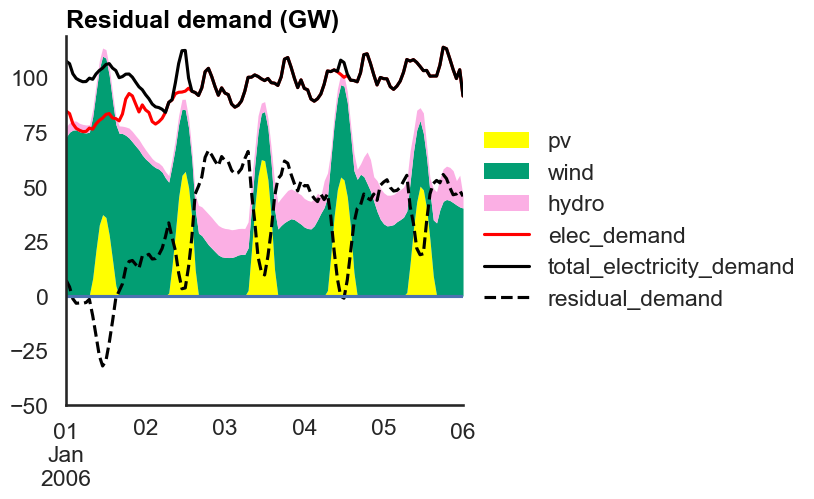

In [7]:
date_start, date_end = datetime.datetime(2006, 1, 1, 0, 0), datetime.datetime(2006, 1, 6, 0, 0)
plot_residual_demand(hourly_generation, date_start, date_end, climate, save_path=None, y_min=-50)

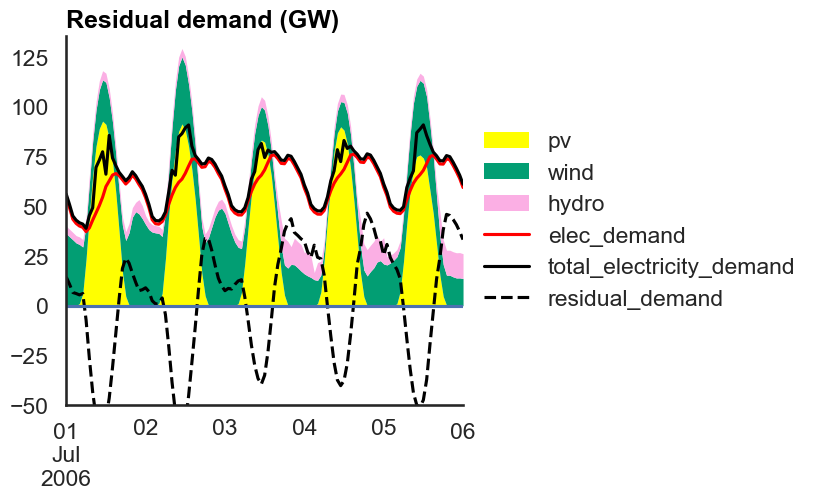

In [8]:
date_start, date_end = datetime.datetime(2006, 7, 1, 0, 0), datetime.datetime(2006, 7, 6, 0, 0)
plot_residual_demand(hourly_generation, date_start, date_end, climate, save_path=None, y_min=-50)

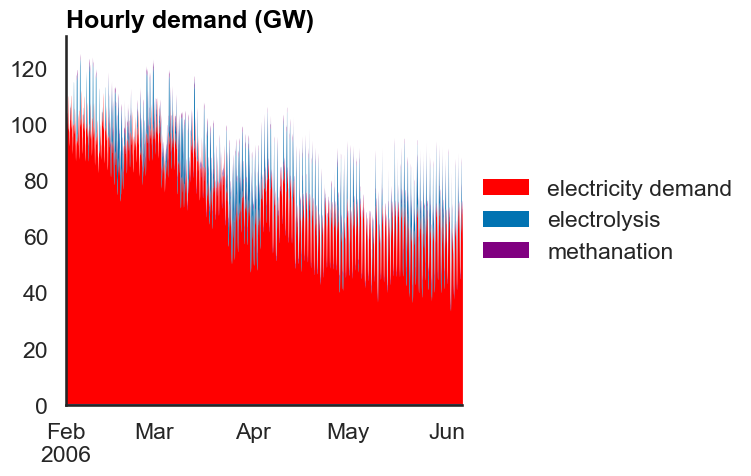

In [7]:
date_start, date_end = datetime.datetime(2006, 2, 1, 0, 0), datetime.datetime(2006, 6, 6, 0, 0)
plot_typical_demand(hourly_generation, date_start, date_end, climate, save_path=None)

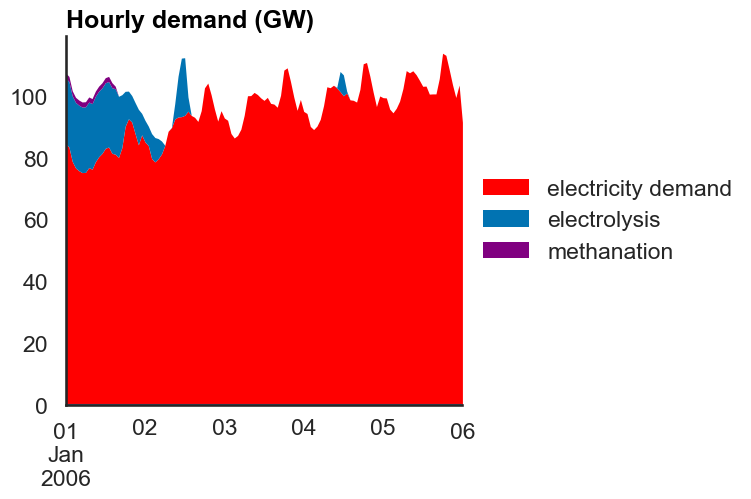

In [8]:
date_start, date_end = datetime.datetime(2006, 1, 1, 0, 0), datetime.datetime(2006, 1, 6, 0, 0)
plot_typical_demand(hourly_generation, date_start, date_end, climate, save_path=None)

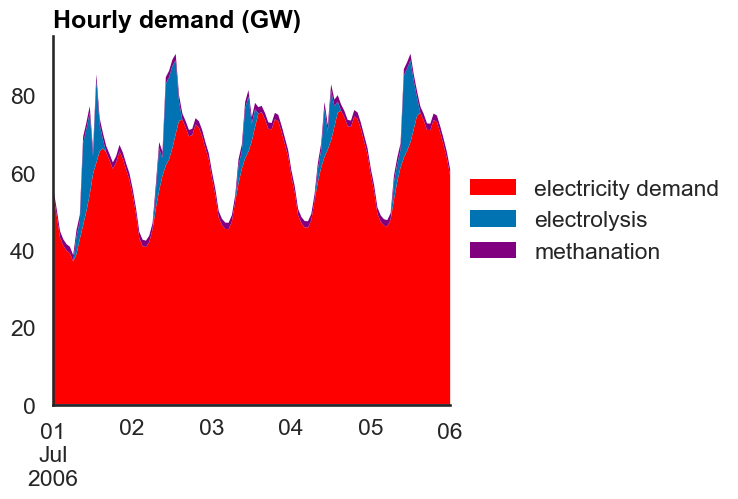

In [5]:
date_start, date_end = datetime.datetime(2006, 7, 1, 0, 0), datetime.datetime(2006, 7, 6, 0, 0)
plot_typical_demand(hourly_generation, date_start, date_end, climate, save_path=None)